<a href="https://colab.research.google.com/github/Nawshin-25/Saint_Martin/blob/main/Nutrients_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import xarray as xr
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_name = '/content/drive/MyDrive/Data/ST_nutrient.nc'
ds = xr.open_dataset(file_name)
print(ds)

<xarray.Dataset> Size: 735kB
Dimensions:    (depth: 50, time: 910, latitude: 1, longitude: 1)
Coordinates:
  * depth      (depth) float32 200B 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * latitude   (latitude) float32 4B 20.5
  * longitude  (longitude) float32 4B 92.25
  * time       (time) datetime64[ns] 7kB 2022-01-01 2022-01-02 ... 2024-06-28
Data variables:
    fe         (time, depth, latitude, longitude) float32 182kB ...
    no3        (time, depth, latitude, longitude) float32 182kB ...
    po4        (time, depth, latitude, longitude) float32 182kB ...
    si         (time, depth, latitude, longitude) float32 182kB ...
Attributes:
    Conventions:       CF-1.11
    contact:           https://marine.copernicus.eu/contact
    credit:            E.U. Copernicus Marine Service Information (CMEMS)
    institution:       Mercator Ocean
    producer:          CMEMS - Global Monitoring and Forecasting Centre
    references:        http://marine.copernicus.eu
    subset:datasetId:  cm

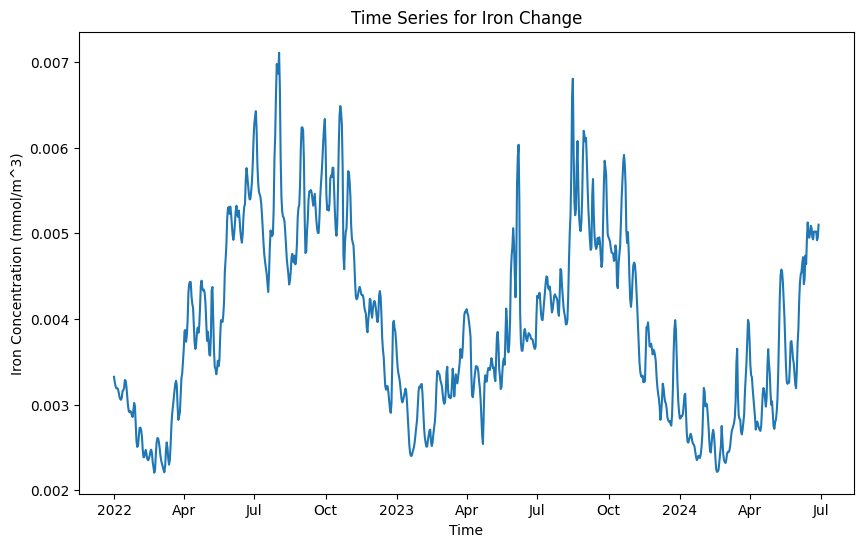

In [9]:
plt.figure(figsize=(10, 6))
pH_time_data = ds['fe'].isel(depth=0, latitude=0, longitude=0)  # First depth, lat, lon
pH_time_data.plot()
plt.title('Time Series for Iron Change')
plt.xlabel('Time')
plt.ylabel('Iron Concentration (mmol/m^3)')
plt.show()

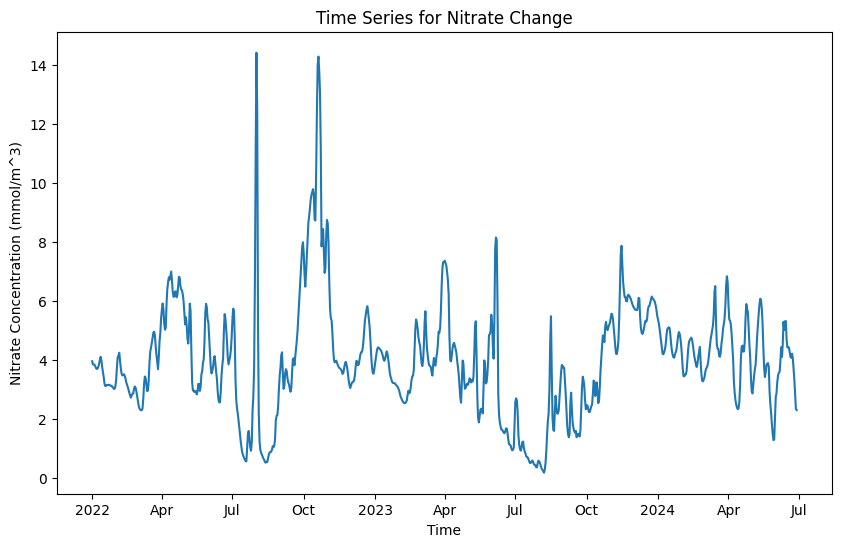

In [8]:
plt.figure(figsize=(10, 6))
pH_time_data = ds['no3'].isel(depth=0, latitude=0, longitude=0)  # First depth, lat, lon
pH_time_data.plot()
plt.title('Time Series for Nitrate Change')
plt.xlabel('Time')
plt.ylabel('Nitrate Concentration (mmol/m^3)')
plt.show()

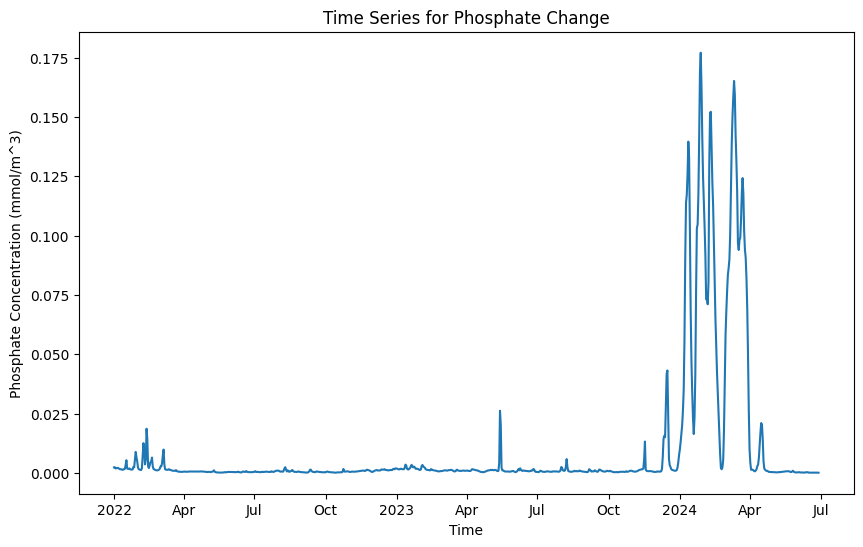

In [7]:
plt.figure(figsize=(10, 6))
pH_time_data = ds['po4'].isel(depth=0, latitude=0, longitude=0)  # First depth, lat, lon
pH_time_data.plot()
plt.title('Time Series for Phosphate Change')
plt.xlabel('Time')
plt.ylabel('Phosphate Concentration (mmol/m^3)')
plt.show()

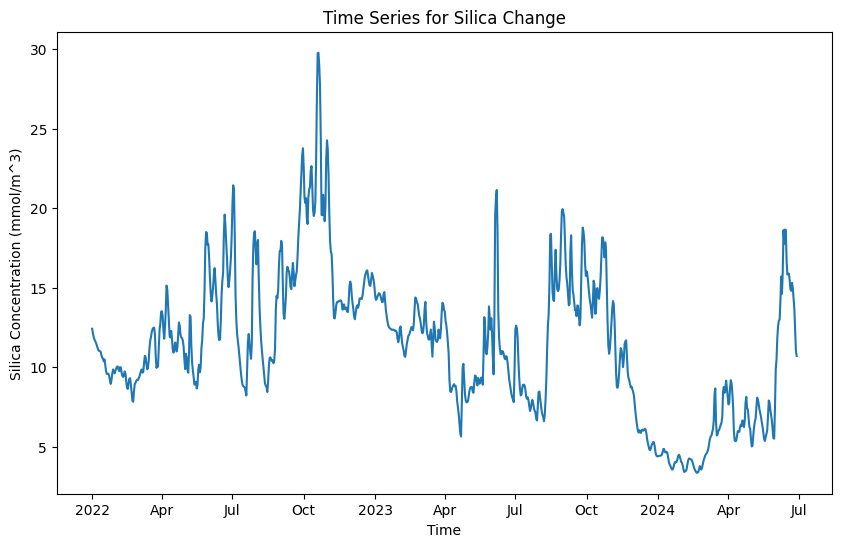

In [6]:
plt.figure(figsize=(10, 6))
pH_time_data = ds['si'].isel(depth=0, latitude=0, longitude=0)  # First depth, lat, lon
pH_time_data.plot()
plt.title('Time Series for Silica Change')
plt.xlabel('Time')
plt.ylabel('Silica Concentration (mmol/m^3)')
plt.show()

In [11]:
fe = ds['fe'].isel(latitude=0, longitude=0).values.flatten()
no3 = ds['no3'].isel(latitude=0, longitude=0).values.flatten()
po4 = ds['po4'].isel(latitude=0, longitude=0).values.flatten()
si = ds['si'].isel(latitude=0, longitude=0).values.flatten()

In [13]:
df = pd.DataFrame({
    'Fe': fe,
    'NO3': no3,
    'PO4': po4,
    'Si': si
})
df = df.dropna()
corr_matrix = df.corr()

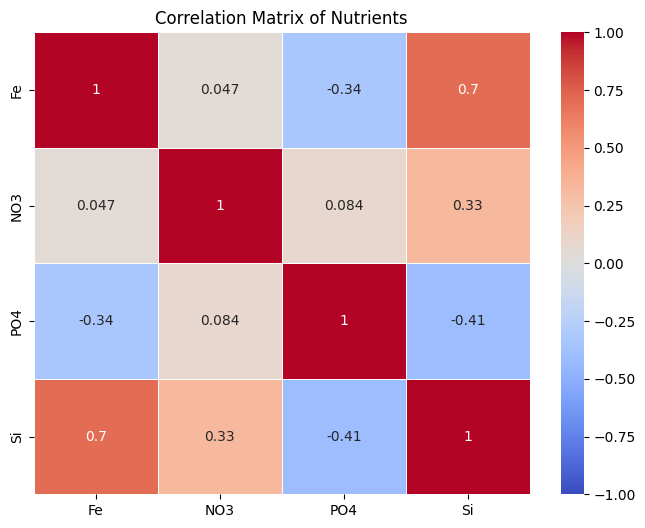

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix of Nutrients')
plt.show()

In [16]:
time = ds['time'].values
depth_idx = 0
fe = ds['fe'].isel(latitude=0, longitude=0, depth=depth_idx).values
no3 = ds['no3'].isel(latitude=0, longitude=0, depth=depth_idx).values
po4 = ds['po4'].isel(latitude=0, longitude=0, depth=depth_idx).values
si = ds['si'].isel(latitude=0, longitude=0, depth=depth_idx).values

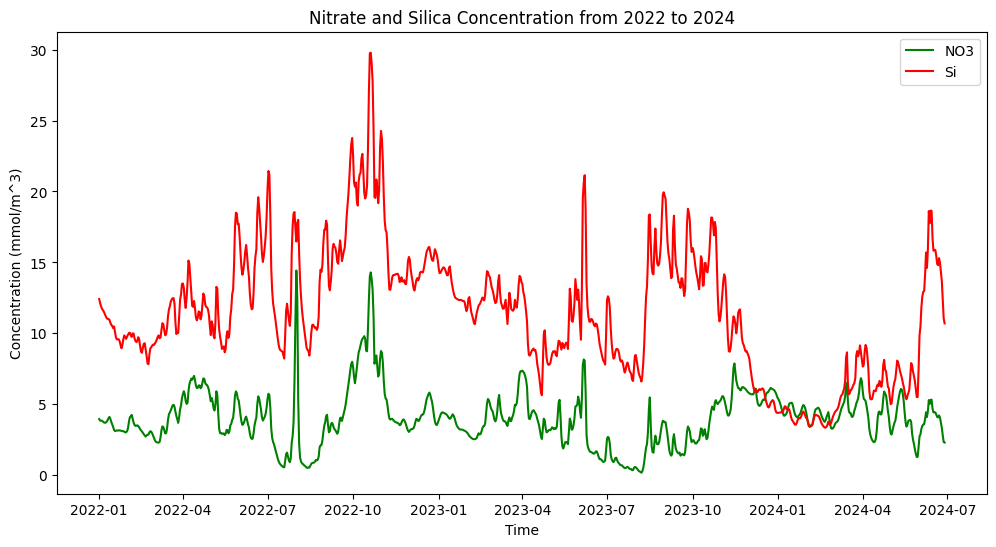

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(time, no3, label='NO3', color='green')
plt.plot(time, si, label='Si', color='red')

plt.title('Nitrate and Silica Concentration from 2022 to 2024'.format(depth_idx))
plt.xlabel('Time')
plt.ylabel('Concentration (mmol/m^3)')
plt.legend()